# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:36:35.005510: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:36:38.397603
2025-04-14 21:36:38.397603


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 5
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:36:32"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

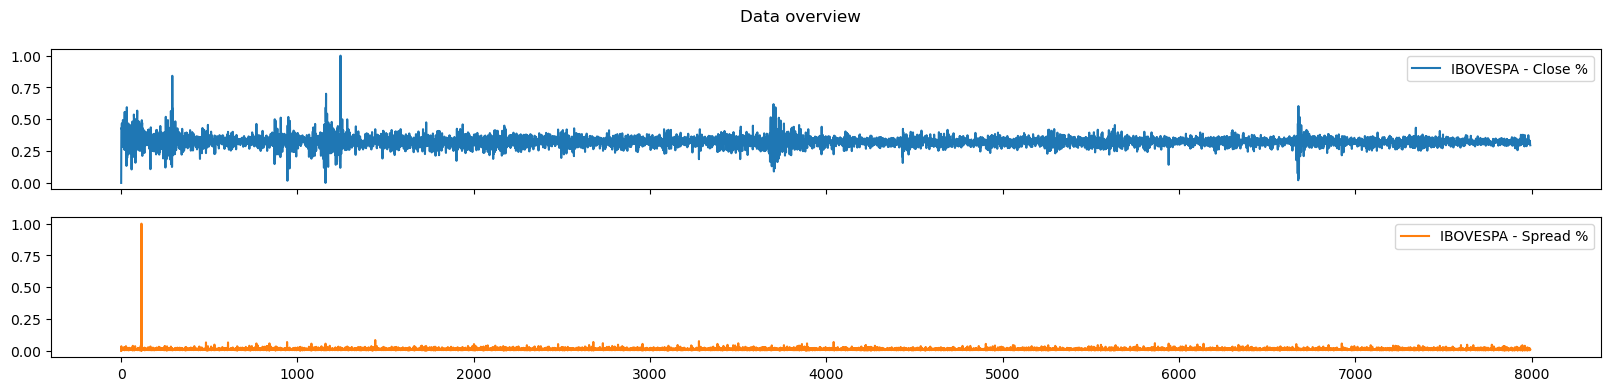

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

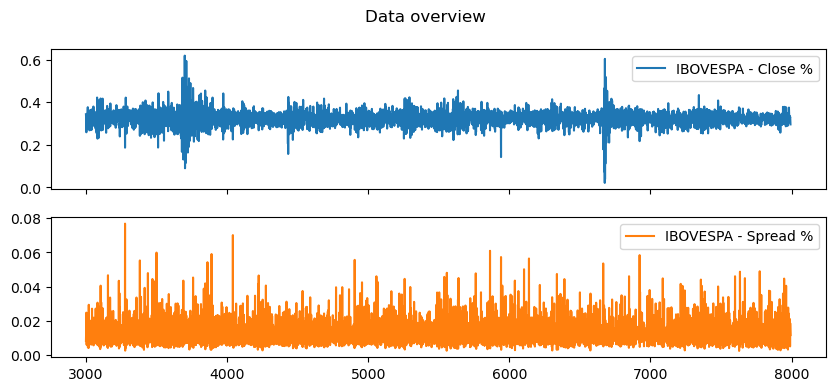

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

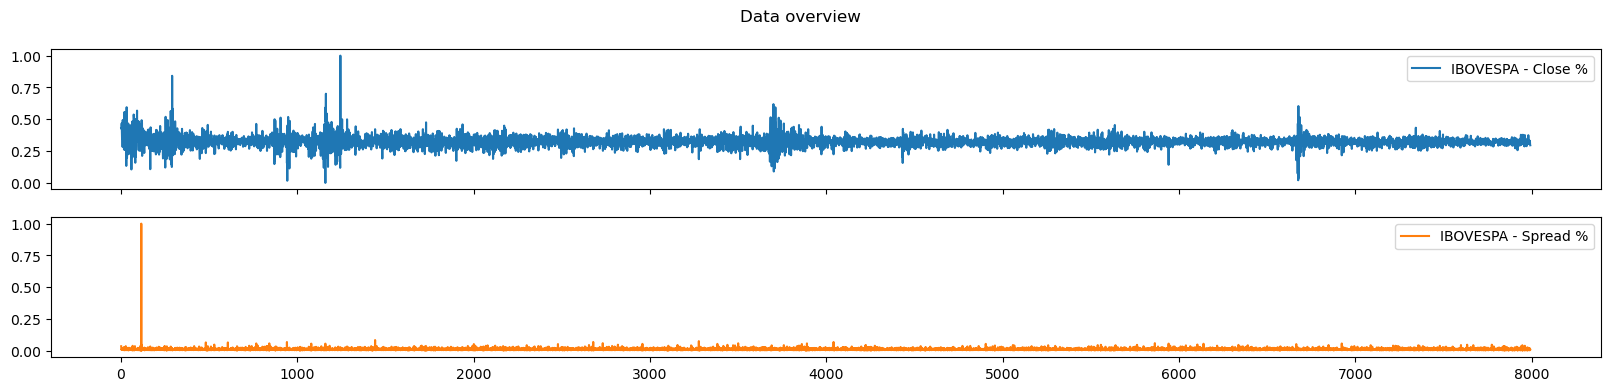

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close %']

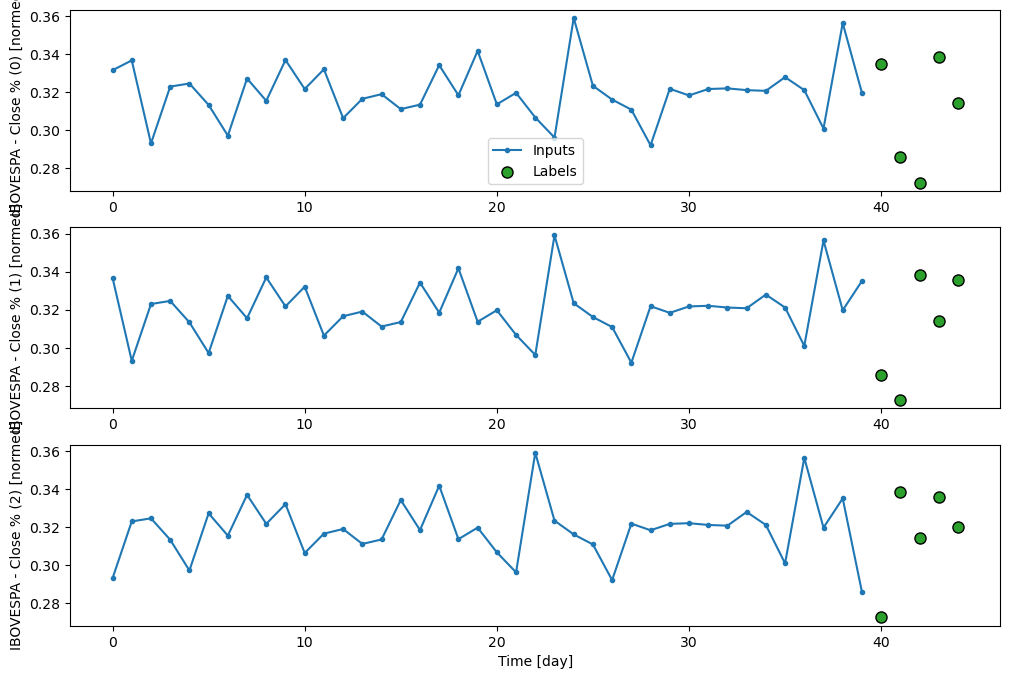

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21:11 5s/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3539

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.3256 - mean_absolute_error: 0.3256 - mean_absolute_percentage_error: 93.5065 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3412  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 90.9899 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.3302

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2918 - mean_absolute_error: 0.2918 - mean_absolute_percentage_error: 85.7102 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.3138

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 81.1682 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.3008

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 76.8509 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 72.9411 - mean_squared_error: 0.0792 - root_mean_squared_error: 0.2775

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 69.5633 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2676

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 66.4579 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2586

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 63.6815 - mean_squared_error: 0.0659 - root_mean_squared_error: 0.2505

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 61.1372 - mean_squared_error: 0.0624 - root_mean_squared_error: 0.2431

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1982 - mean_absolute_error: 0.1982 - mean_absolute_percentage_error: 58.8237 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2363

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 56.7152 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2301

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 54.8135 - mean_squared_error: 0.0542 - root_mean_squared_error: 0.2244

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 53.1717 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2192

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1732 - mean_absolute_error: 0.1732 - mean_absolute_percentage_error: 51.7449 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2145

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 50.4159 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2100

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 8545.2754 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.2059

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - mean_absolute_percentage_error: 23500.9238 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.2022

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1561 - mean_absolute_error: 0.1561 - mean_absolute_percentage_error: 36162.6172 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1988

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 46937.4688 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1956

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1494 - mean_absolute_error: 0.1494 - mean_absolute_percentage_error: 56147.2461 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1925

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1464 - mean_absolute_error: 0.1464 - mean_absolute_percentage_error: 64048.9844 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1896

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 70849.9922 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1868

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 76718.9453 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1842

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 81794.1797 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1817

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 86190.0078 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1793

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 90001.5000 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1770

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 93308.2656 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1748

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 96177.2969 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1727

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 98665.3125 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1707

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1253 - mean_absolute_error: 0.1253 - mean_absolute_percentage_error: 100820.5547 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 102684.2422 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1669

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 104291.7812 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1651

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 105673.6406 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1634

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 106856.2031 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1617

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 107862.3672 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1601

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 108712.0781 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1586

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 109422.7656 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1571

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 110009.6953 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1556

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 110486.2969 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1542

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 110864.3906 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1528

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 111154.4219 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1515

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 111365.6328 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1502

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 111506.2422 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1489

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 111583.5469 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1477

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 111604.0312 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1465

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 111573.5234 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1454

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 111497.1953 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1443

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 111379.7109 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1432

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 111225.2266 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1421

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 111037.5000 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1411

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 110819.9062 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1400

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 110575.4844 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1390

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 110306.9766 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1381

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 110016.8516 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1371

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 109707.3594 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1362

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 109380.5312 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1353

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 109038.2031 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1345

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 108682.0312 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1336

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 108313.5469 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1328

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 107934.1016 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1320

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 107544.9688 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1312

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 107147.2656 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1305

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 106742.0469 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1297

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 106330.2422 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1290

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 105912.7188 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1283

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 105490.2578 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1275

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 105063.5781 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1268

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 104633.3359 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1262

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 104200.1172 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1255

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 103764.4766 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1248

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 103326.9141 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1242

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 102887.8750 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1235

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 102447.7734 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1229

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 102007.0000 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1223

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 101565.8906 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1217

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 101124.7578 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1211

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 100683.8984 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1205

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 100243.5781 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1199

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 99804.0312 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1194 

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 99365.4766 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1188

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 98928.1094 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1183

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 98492.1172 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1177

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 98057.6641 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1172

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 97624.9062 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1167

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 97193.9609 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1162

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 96764.9688 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1157

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 96338.0312 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1152

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 95913.2500 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1147

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 95490.7109 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1142

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 95070.5078 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1138

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 94652.7109 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1133

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 94237.3750 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1128

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 93824.5547 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1124

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 93414.3203 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1119

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 93006.7031 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1115

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 92601.7422 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1111

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 92199.4766 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1106

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 91799.9297 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1102

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 91403.1250 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1098

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 91009.0938 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1094

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 90617.8438 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1090

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 90229.3906 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1086

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 89843.7578 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1082

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 89460.9297 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1078

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 89080.9219 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1074

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 88703.7422 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1070

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 88329.3750 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1067

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 87957.8359 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1063

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 87589.1016 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1059

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 87223.1797 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1056

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 86860.0625 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1052

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 86499.7266 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1049

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 86142.1797 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1045

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 85787.3984 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1042

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 85435.3750 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1038

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 85086.0938 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1035

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 84740.1797 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1032

237/237 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 84569.3281 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1030 - val_loss: 0.0147 - val_mean_absolute_error: 0.0147 - val_mean_absolute_percentage_error: 4.4932 - val_mean_squared_error: 3.3811e-04 - val_root_mean_squared_error: 0.0184 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 28.2897 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1019

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 26.2695 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1028 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 24.3668 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0973

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 23.3456 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0931

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 23.5428 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 23.2914 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.8154 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 22.2820 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.7205 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.1714 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 20.6317 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0833

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.1122 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 19.6325 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.2247 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0788

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 18.9552 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.7926 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0768

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.6288 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 8727.1553 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 24058.0547 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 37037.5273 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 48082.8828 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 57523.9414 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 65624.1797 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 72596.1016 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 78612.6016 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 83815.4844 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 88321.9141 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 92229.3672 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 95619.4219 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 98560.7734 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 101111.5469 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 103321.1875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 105231.9688 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 106880.1641 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 108297.0156 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 109509.5625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 110541.2812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 111412.6250 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 112141.4375 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 112743.3906 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 113232.2422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 113620.1094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 113917.6875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 114134.4766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 114278.8828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 114358.3906 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 114379.6484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 114348.6250 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 114270.6328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 114150.4375 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 113992.3203 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 113800.1172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 113577.2969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 113326.9609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 113051.9375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 112754.7500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 112437.7031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 112102.8828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111752.1641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111387.2656 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 111009.7188 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110620.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110222.2422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109814.7500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109399.5391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108977.5781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108549.7500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108116.8672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107679.6484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107238.7734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106794.8516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106348.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105900.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105450.1484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104999.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104547.4688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104095.4375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103643.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103191.6094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102740.3750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102289.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101840.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101392.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100945.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100500.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100056.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99615.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592 

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99175.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98737.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98302.6406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97869.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97438.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97010.8047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96585.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96162.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95741.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95323.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94908.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94496.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94087.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93680.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93276.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92875.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92477.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92082.4062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91690.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91300.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90914.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90530.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90149.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89771.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89396.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89024.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88655.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88288.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87925.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87564.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87206.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86851.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86676.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 4.1908 - val_mean_squared_error: 2.9237e-04 - val_root_mean_squared_error: 0.0171 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 28.3469 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1012

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 26.0766 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1008 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 24.1559 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0950

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 23.1564 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.3359 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.0752 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6006 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.0699 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.5150 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 20.9727 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0835

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.4383 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 19.9240 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.4491 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0788

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.0457 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.7783 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.6175 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.4560 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 8769.1768 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 24174.3574 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 37216.7188 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 48315.5898 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 57802.3945 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0729

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 65941.8828 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 72947.5781 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 78993.2344 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 84221.3281 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 88749.6016 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 92675.9922 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 96082.4766 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 99038.0781 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 101601.2109 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 103821.5703 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 105741.6094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 107397.7891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 108821.5078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 110039.9297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 111076.6562 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 111952.2188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 112684.5625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 113289.4375 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 113780.6641 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 114170.4062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 114469.4375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 114687.2812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 114832.3828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 114912.2734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 114933.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 114902.4688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 114824.1016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 114703.3281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 114544.4453 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 114351.3203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 114127.4141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 113875.8750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 113599.5156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 113300.8906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 112982.3125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 112645.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 112293.4531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 111926.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 111547.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 111156.7656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110756.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110346.6562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109929.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109505.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109075.5391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108640.5547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108201.2188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107758.2109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107312.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106863.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106413.0078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105960.9219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105507.7500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105053.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104599.6484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104145.4062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103691.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103238.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102785.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102333.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101883.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101434.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100987.0625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100541.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100097.6406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99655.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99216.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98778.7891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98343.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97910.9531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97480.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97052.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96627.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96205.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95785.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95368.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95161.1484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94748.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94338.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93931.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93526.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93125.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92726.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92330.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91938.1562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91548.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91161.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90777.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90396.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90017.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89642.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89269.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88900.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88533.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88169.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87808.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87628.8828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87450.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87096.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 4.2004 - val_mean_squared_error: 2.9504e-04 - val_root_mean_squared_error: 0.0172 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 28.3194 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1013

  2/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 27.5464 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1035 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 25.0958 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0986

  5/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 24.2035 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958

  6/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 23.4375 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0931

  7/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 23.1636 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0916

  8/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 23.3148 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0919

  9/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 23.3286 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0917

 11/237 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.0632 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0907

 13/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.5808 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 14/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 22.3201 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0882

 16/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.7664 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0865

 18/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.2017 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0847

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.6666 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 22/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.1364 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0814

 24/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.6419 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.1921 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.8190 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772 

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6697 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.5099 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0754

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.3608 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 15846.6123 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 29208.7168 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 40551.5703 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0735

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 50226.3594 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 58512.1562 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 65632.9922 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 71770.3750 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 77072.5781 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 81661.6875 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 85638.9219 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 89088.7266 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 90638.4688 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 93426.5703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 94678.6797 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 96929.4766 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 98877.7188 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 100560.5078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 101312.5078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 102655.5391 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 103804.9141 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104782.8828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105608.8203 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106299.6562 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106870.2500 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107333.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107701.2812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107983.3594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108095.1562 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108188.8516 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108325.7344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108401.0859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108421.2422 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108391.8281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108360.1328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108317.8984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108265.6719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108133.2812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107966.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107769.7188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 107545.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107295.7969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107024.3047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106732.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106423.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106098.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105759.2500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105407.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105043.8359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104670.4609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104288.2266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104094.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103700.5391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103300.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103098.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102895.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102484.6875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102070.2500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101652.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101231.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100808.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100383.3594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99956.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604 

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99529.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99101.2422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98672.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98458.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98244.2500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97816.0078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97388.2812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96961.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96535.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96110.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95686.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95264.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94844.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94425.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94009.1172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93594.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93181.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92771.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92363.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91957.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91553.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91152.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90754.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90358.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89964.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89574.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89185.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88800.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88417.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88037.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87660.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87285.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86913.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86544.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86178.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85814.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85453.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85095.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84739.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84387.0000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84036.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83689.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83344.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83002.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82663.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82327.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82161.6172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 3.9245 - val_mean_squared_error: 2.5618e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4135 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 26.0353 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 24.1008 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0940

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.0825 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.2495 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 22.9856 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 22.5071 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 21.9732 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 21.4155 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0845

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 20.8741 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0828

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 20.3412 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0812

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 19.8294 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.3531 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0782

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.9510 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6939 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.5454 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.3915 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8215.2256 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 22645.3184 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 34862.1484 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 45258.5039 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 54144.8281 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 61769.1133 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 68331.3750 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 73994.3594 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 78891.5312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 83133.1797 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 86811.0312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 90001.8984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92770.4141 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 95171.3047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97251.1172 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99049.6172 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100600.9609 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101934.5625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103075.8594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104046.9609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104867.0938 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105553.0859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106119.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 106579.7969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 106944.8672 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 107224.9609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 107429.0078 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 107564.9297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107639.7578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 107659.7656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 107630.5625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107557.1484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107444.0156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107295.1797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 107114.2734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 106904.5391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106668.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106410.0391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106130.3125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105831.8906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105516.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105186.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104843.1641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104487.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104121.8750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103746.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103363.0312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102972.2188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102575.0469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102172.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101764.9062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101353.3750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100938.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100520.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100100.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99678.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603 

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99254.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98830.3750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98405.2266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97979.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97554.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97129.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96704.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96280.3281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95857.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95435.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95014.8828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94595.8125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94178.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93762.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93348.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92937.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92527.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92119.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91714.3906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91311.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90910.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90512.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90116.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89723.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89332.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88944.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88559.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88176.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87796.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87419.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87044.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86672.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86303.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85936.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85572.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85211.7109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84853.2969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84497.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84144.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83794.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83446.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83101.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82759.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82420.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82083.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 81749.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 81584.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130 - val_mean_absolute_percentage_error: 4.0472 - val_mean_squared_error: 2.6478e-04 - val_root_mean_squared_error: 0.0163 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 28.5732 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 26.0650 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0987 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.1097 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0533 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.1737 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.8869 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.3992 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.8615 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.3034 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.7636 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 20.2327 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.7237 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.2510 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.8518 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.6000 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.4595 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.3128 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8061.2031 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22220.2852 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 34207.6719 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 44408.7734 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 53128.2070 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 60609.3008 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 63948.3320 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 67048.3203 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 69928.1484 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 75094.2344 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 79565.5312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 83440.6562 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 86801.8984 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89718.3516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 92248.3359 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0696

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94441.3438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96339.5703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97979.1641 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99391.1953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 100602.5000 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 101636.3438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 102512.9375 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103249.9297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 103862.7656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104364.9844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 104768.5234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 105083.8828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 105320.3828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 105486.2578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 105588.8359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 105634.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 105629.4844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 105578.5547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 105486.5156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 105357.5234 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 105195.3281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 105003.2969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 104784.4531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104541.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 104277.0234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 103993.1250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103691.8750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103375.0938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103044.4453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102701.4219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102347.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101983.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101611.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 101231.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100844.4531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100451.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100054.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99652.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609 

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 99246.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98838.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98427.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 98013.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97598.9453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 97182.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96765.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96348.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95931.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95513.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 95096.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94680.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 94264.6797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93850.1406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93436.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 93024.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92614.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92205.6953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91798.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91393.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90990.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90589.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90190.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89794.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89399.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89007.9141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88618.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88231.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87846.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87464.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87085.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86708.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86334.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85962.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85593.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85227.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84863.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84502.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84144.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83788.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83435.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83085.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82737.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82392.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82049.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81710.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81373.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 81038.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80706.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 80377.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 80052.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8974 - val_mean_squared_error: 2.5076e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4701 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 26.0350 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0994 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 24.0840 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0936

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.0184 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.1356 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.8483 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.3583 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0874

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 21.8194 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.2594 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.7186 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.1883 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.6797 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.2082 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8095 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.5587 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.4205 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.2767 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8036.8247 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 22153.0488 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 34104.1523 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 44274.3789 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 52967.4180 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 60425.8711 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 66845.3984 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 72385.2109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 77175.8594 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 81325.2500 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 84923.1094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 88044.5703 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 90752.8672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93101.5391 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95136.1094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96895.5000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98413.1016 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 99717.6953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 100834.1719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 101784.1484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 102586.4453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103257.5156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 103811.7812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104261.8906 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 104619.0234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 104893.0312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 105092.6406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 105225.6016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 105298.7969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 105318.3750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 105289.8047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 105217.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 105107.3125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 104961.7188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 104784.7422 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 104579.5703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 104349.0625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104095.8203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 103822.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 103530.2500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103221.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 102899.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102563.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102215.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 101857.4219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101490.2969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101115.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100732.7734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100344.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 99950.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613 

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99551.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99149.1406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98743.1875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98334.4375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97923.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97510.5312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97096.2734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96681.0078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96265.1016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95848.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95432.6406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95016.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94601.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94186.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93772.5938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93359.8906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92948.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92538.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92130.1719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91723.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91318.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90915.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90515.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90116.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89719.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89325.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88933.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88544.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88156.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87772.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87390.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87010.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86633.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86259.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85887.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85518.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85151.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84787.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84426.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84067.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83711.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83358.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83007.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82659.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82314.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81971.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81631.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81294.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80959.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80627.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80297.9531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 79971.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 79810.2969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7571 - val_mean_squared_error: 2.3233e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4976 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 25.9831 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0567 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0622 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.2490 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.9980 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.5255 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 21.9952 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.4372 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.8962 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.3665 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.8568 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.3836 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.9817 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.7273 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.5872 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.4431 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 8072.6016 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 22251.5156 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 34255.6953 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 44471.0898 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 53202.7344 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 60694.3086 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 67142.3516 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 72706.7656 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 77518.6953 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 81686.5078 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 85300.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 88435.6719 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0703

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 91156.0000 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93515.1016 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 95558.7109 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 97325.9141 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98850.2578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100160.6406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101282.0781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102236.2734 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103042.1406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 103716.1875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 104272.9141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 104725.0234 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 105083.7422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 105358.9688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 105559.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 105693.0156 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 105766.5391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 105786.2031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 105757.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 105685.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 105574.2031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 105427.9609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 105250.1953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 105044.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 104812.5859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 104558.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 104283.3594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 103990.1328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 103680.4609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 103356.0938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103018.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 102669.4297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102309.8672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 101941.1094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 101564.2344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 101180.2188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 100789.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 100394.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100194.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 99792.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613 

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 99386.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 98976.8281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98565.0469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98151.2109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 97735.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97319.1094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 96901.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96483.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96065.5703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95647.5703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95229.9609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94812.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94396.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 93981.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 93567.7891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93155.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92744.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92334.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 91927.3984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91521.7500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91118.1016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90716.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90317.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89920.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89525.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89132.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88742.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88355.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 87969.9141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87587.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87207.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86829.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86455.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86082.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85713.4609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85346.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84982.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84620.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84262.0312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83905.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83552.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83201.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82853.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82507.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82164.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81824.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81487.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81152.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 80819.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80490.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80164.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8089 - val_mean_squared_error: 2.3972e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4577 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9423 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 24.0828 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.2193 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.5356 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 23.3559 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.9138 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 22.3978 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.8437 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0841

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.5666 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 21.0336 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 20.5067 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 20.0107 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.5595 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 19.1776 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0761

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 19.0223 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.8583 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.7062 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 15697.8984 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 28934.1660 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 40170.2031 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 49753.8789 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 57961.6406 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 65015.4141 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 71095.0000 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 76347.2812 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 80893.1719 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 84832.9531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 88250.2734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 91215.3906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0703

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 93787.5859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 96017.1875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 97947.0859 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 99614.0312 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 101049.6250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 102281.1406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 103332.2266 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 104223.4453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104972.7344 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105595.7969 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105864.3594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106323.3750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106516.6641 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106837.2891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107077.7344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107246.3750 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 107350.6641 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107397.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 107391.9844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 107340.2109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 107246.6250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 107115.4844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 106950.5781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 106755.3359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 106647.3203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106412.2578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 106154.0078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 105874.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 105577.2422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105262.8516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104933.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104590.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 104236.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103871.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103496.9453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103114.3125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102724.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102328.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101926.5000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101520.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101109.4844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100695.5078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100278.6719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99859.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608 

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99438.4688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 99016.0156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98592.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98168.4141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97743.9609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97319.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96895.2734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96471.5781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96048.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95626.6094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95205.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94786.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94368.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93951.7109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93537.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93124.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92713.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92304.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91898.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91493.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91091.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90691.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90492.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90096.9766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89703.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89312.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88924.0781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88538.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88155.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87774.5938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87396.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87021.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86649.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86279.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85912.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85548.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85186.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84827.4844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84471.2969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84117.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83767.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83418.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83073.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82730.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82390.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82053.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81718.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81388.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8811 - val_mean_squared_error: 2.4970e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4212 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 25.9673 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0991 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 24.0552 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0932

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 23.0784 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.2959 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 23.0669 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.6037 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 22.0787 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.5221 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.9806 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.7143 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.1894 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.6970 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.2495 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.8724 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.7216 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.5619 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.4139 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 15728.5977 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 28991.0273 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 40249.2773 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 49851.8984 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 58075.8867 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 65143.6016 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 71235.2031 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 76497.8672 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 81052.7500 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 85000.3203 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 88424.4062 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 91395.3750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 93972.6641 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 96206.6719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 98140.3906 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99810.6328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101249.0625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102483.0156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103536.1875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104429.1719 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105179.9453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105804.2344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106315.8516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106726.9375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107048.1953 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107289.1172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 107458.1016 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 107562.5938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 107609.2578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107604.0078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 107552.1250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 107458.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 107326.9609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 107161.7344 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106966.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 106743.1797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 106495.7266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 106226.2578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105937.0547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 105630.1719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 105307.4688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 104970.6328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 104621.2031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 104260.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103889.9688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 103510.5781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 103123.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 102729.5156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 102329.6641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101924.6797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 101515.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101102.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100685.8359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 100266.9453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 99845.9609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605 

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 99423.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98999.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 98574.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 98149.6406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 97724.3047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 97299.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96874.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 96450.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 96026.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95604.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 95183.3984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94763.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 94345.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93929.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 93514.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93102.0312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92691.4141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92282.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91876.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 91472.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91070.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90671.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90274.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89880.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89488.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89099.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88713.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88329.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87947.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87569.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87193.4453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86820.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86449.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86082.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85899.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85716.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85535.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85174.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84816.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84638.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84460.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84107.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83757.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83410.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83237.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83065.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82723.4375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82384.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82047.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81713.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81548.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7990 - val_mean_squared_error: 2.3853e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4555 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  2/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 27.3703 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1011

  3/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 25.9298 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984

  5/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 24.0488 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925

  6/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 23.3528 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

  7/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.1499 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

  9/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.4467 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 10/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.4043 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 11/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 23.2626 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.8206 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 22.3060 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 16/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 22.0352 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 18/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.4789 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.9463 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 22/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.4180 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 24/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.9211 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.4683 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771 

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 19.0849 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.9263 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.8438 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.7590 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.6042 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0735

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 15833.8359 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 29184.9492 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 35080.0508 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 45541.3359 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 54483.1602 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 58464.2812 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 65579.2578 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 71711.5859 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 77009.4375 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 81594.7734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 85568.7344 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 89015.7109 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 90564.1797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 93349.9922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 95765.8750 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 96850.0156 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98796.6641 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100478.0703 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101926.1172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 103168.3203 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103719.8047 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104228.5234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104696.9688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105522.2266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106212.5000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106782.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107245.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107612.9766 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107894.8203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108100.1484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108236.9141 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108312.2109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108332.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108302.9531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108229.0859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108176.8984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108115.2422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 107965.4844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107783.4375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107572.3906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107335.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107207.8125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107074.8047 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 106793.3281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106493.0391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106175.9219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105843.7422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105498.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105140.5469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104772.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104394.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104008.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103615.4922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103416.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103215.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102810.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102400.6328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101986.5312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101568.9609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101148.5078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100725.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100301.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99874.9062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601 

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99447.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99019.9453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98591.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98163.6562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97735.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97308.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96881.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96456.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96031.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95608.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95186.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94766.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94348.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93931.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93517.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93105.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92695.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92287.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91881.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91478.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91077.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90679.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90284.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89890.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89500.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89112.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88727.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88345.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87965.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87588.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87213.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86842.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86473.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86107.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85743.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85383.3125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85025.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84670.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84317.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83967.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83620.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83276.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82934.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82595.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82260.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82094.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8369 - val_mean_squared_error: 2.4379e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4377 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 25.9580 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 24.0298 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.0151 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.1873 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.9332 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.4585 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 21.9284 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.3700 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.8286 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.2998 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.7909 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.3181 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.9152 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.6546 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.5049 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.3520 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8278.9160 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22821.1992 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35133.0156 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 45610.1992 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54565.6133 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62249.1758 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 68862.4609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 74569.4766 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79504.7266 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 83779.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87485.8125 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90701.4922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93491.5312 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 95911.0938 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98007.0781 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99819.5703 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101382.9766 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102726.9453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103877.1250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104855.7734 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105682.2891 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106373.6172 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106944.6094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107408.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107776.2266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108058.5078 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108264.1406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108401.1172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108476.5312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108496.7031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108467.2734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108393.2891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108279.2734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108129.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107946.9688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107735.6016 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107498.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107237.2656 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106955.3594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106654.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106337.0156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106004.3438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105658.2031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105300.0781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104931.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104553.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104166.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103772.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103372.4531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102966.6328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102556.0078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102141.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101723.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101301.9922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100878.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100453.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100026.4531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99598.6641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99170.2031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98741.4219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98312.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97884.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 97456.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97028.7734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96602.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96177.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95753.4922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95331.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94910.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94491.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94074.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93659.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93246.5703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92835.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92427.3359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92021.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91617.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91216.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90817.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90421.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90027.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89636.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89247.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88862.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88479.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88098.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87721.1641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87346.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86974.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86604.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86238.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85874.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85512.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85154.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84798.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84445.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84095.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83747.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83402.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83060.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82721.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82384.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82218.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7703 - val_mean_squared_error: 2.3459e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4816 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 25.9324 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0982 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 24.0451 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.1308 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 23.4120 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.2209 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.7764 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.2609 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0853

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.7097 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 21.1700 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.6362 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 20.1202 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.6389 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 19.2272 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.9570 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.8798 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.7106 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.5542 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 15885.2764 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 29279.8555 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 40650.2773 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 50348.5781 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 58654.5078 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 65792.6484 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 71944.9453 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 77260.0391 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 81860.3047 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 85847.2031 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 89305.3984 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92305.9766 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 94908.9375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97165.2031 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99118.1875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100805.0703 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102257.8281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103504.0703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104567.7344 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105469.6094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106227.8594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106858.3750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107375.0859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107790.2578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108114.7188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108358.0391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108528.7031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108634.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108681.3594 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108676.0547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108623.6562 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108528.9609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108396.2500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108229.3750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108031.7969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107806.6484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107556.7266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107284.5703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106992.4844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106682.5391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106356.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106016.4297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105841.4766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105663.5156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105482.7266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105113.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104924.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104541.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104150.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103752.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103349.1406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102940.1172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102526.6406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102109.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101688.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101265.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100840.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100413.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99985.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598 

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99556.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99127.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98697.8984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98268.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97839.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97410.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96983.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96556.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96131.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95707.8438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95285.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94865.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94446.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94029.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93614.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93202.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92791.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92383.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91978.2578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91575.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91174.2656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90776.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90380.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89987.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89596.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89209.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88824.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88441.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88062.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87685.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87311.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86939.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86570.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86204.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85841.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85481.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85123.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84768.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84416.3672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84066.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83719.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83375.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83034.3516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82695.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82361.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7860 - val_mean_squared_error: 2.3659e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4775 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 25.9322 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0982 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 24.0497 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.1392 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.4247 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.2385 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.7984 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.2852 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.7352 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 21.1960 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.6619 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 20.1455 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.6639 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 19.2522 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.9829 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.8234 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.6603 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 8257.5830 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 22761.7773 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 35041.3438 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 45491.0820 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 54423.0352 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 62086.4727 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 68682.4297 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 74374.4922 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 79296.8125 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 83560.2422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 87256.9922 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 90464.2422 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 93246.9766 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 95660.1953 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97750.6875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99558.4297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101117.7422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102458.1875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103605.3516 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104581.4375 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105405.7812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106095.2969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106664.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107127.2734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107494.2188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107775.7578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107980.8594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108117.4688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108192.6875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108212.7969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108183.4375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108109.6484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 107995.9375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107846.3359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107664.4922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107453.6797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107216.8438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 106956.6406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106675.4766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106375.5234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106058.7500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105726.9375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105381.7109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105024.5234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104656.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104279.4922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103893.9688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103501.1484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103101.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102697.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102287.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101873.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101456.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101036.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100614.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100190.3359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99764.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599 

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99338.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98910.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98483.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98055.3359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97627.9219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97201.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96774.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96349.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95925.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95502.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95081.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94662.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94244.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93828.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93414.3984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93002.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92592.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92185.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91780.3672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91377.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90977.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90579.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90184.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89791.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89401.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89014.3672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88629.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88247.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87868.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87491.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87117.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86746.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86378.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86012.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85649.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85289.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84931.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84576.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84224.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83875.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83528.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83184.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82843.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82504.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82169.2578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82003.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8146 - val_mean_squared_error: 2.4060e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4517 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 25.9336 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 24.0323 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.0784 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.3245 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.1177 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.6679 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.1508 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.5994 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.3250 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.7931 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.5266 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 20.0112 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.5309 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.1207 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.9343 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.8532 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6955 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.5342 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8262.0693 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 15825.0811 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22774.3828 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 35060.8242 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 45516.4102 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 50157.8516 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 58432.3242 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 65543.4219 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 71672.4219 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 76967.3828 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 81550.2344 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 85522.0312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 88967.1328 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 91956.3438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 94549.4531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96797.1719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 98742.7578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100423.2578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101870.5156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103112.0391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104171.6719 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105070.1328 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105825.5156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106453.6328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106968.3906 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107381.9922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107554.2812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107835.9766 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108041.1875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108177.8828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108253.1328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108273.2578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108243.8906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108212.2344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108117.8984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107985.6875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107819.4453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107622.6172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107398.3203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107149.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106878.2266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106587.2422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106278.4766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105953.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105614.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105263.3125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105083.2031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104900.4531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104527.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104337.7656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104145.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103952.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103558.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103159.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102754.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102344.7812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101930.9062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101513.5703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101093.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100670.7734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100246.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99820.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598 

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99393.5234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98965.9531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98538.0469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98110.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97682.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97255.3281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96828.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96403.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96191.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95979.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95767.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95345.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94924.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94505.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94088.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93673.4219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93260.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93054.5078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92644.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92236.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91831.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91629.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91228.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90828.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90432.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90038.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89646.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89257.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88871.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88487.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88106.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87728.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87353.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86980.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86610.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86243.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85878.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85516.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85157.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84801.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84447.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84096.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83748.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83402.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83060.0391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82719.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82382.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82049.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8539 - val_mean_squared_error: 2.4603e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4353 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 25.9279 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0182 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0440 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.2702 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.0520 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.5961 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.0762 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.5236 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.9840 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.4508 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.9364 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.4572 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 19.0483 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.7819 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.6253 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.4652 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8276.8994 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22815.4395 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35124.0859 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 45598.5703 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54551.6758 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 62233.2617 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 68844.8438 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 74550.3828 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 79484.3594 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 83757.8906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 87463.3906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 90678.2422 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93467.5625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95886.5000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97981.9453 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99793.9688 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101356.9688 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102700.5938 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103850.4688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104828.8672 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105655.1641 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106346.3125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106917.1562 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107380.7344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107748.5547 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108030.7578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108236.3359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108373.2812 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108448.6719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108468.8281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108439.4062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108365.4453 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108251.4531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108101.5078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107919.2344 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107707.9219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107470.5234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107209.7031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106927.8750 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106627.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106309.6875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105977.0938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105631.0469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105273.0156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104904.3359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104526.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104139.7891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103746.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103345.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102940.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102529.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102115.0234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101696.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101275.9531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100852.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100640.2109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100214.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99787.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99358.9453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98930.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98501.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98073.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97644.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97217.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96790.5938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96364.9531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95940.5469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95517.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95096.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94676.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94258.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93842.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93428.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93016.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92607.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92200.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91795.3906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91392.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90993.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90595.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90200.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89808.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89418.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89031.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88647.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88265.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87887.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87510.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87137.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86766.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86398.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86033.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85671.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85311.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84954.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84600.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84423.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84073.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83726.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83381.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83039.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82699.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82363.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82197.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8390 - val_mean_squared_error: 2.4400e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4416 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 25.9331 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0128 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0120 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.2065 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.9701 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.5057 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 21.9817 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.4273 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.8873 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.3549 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.8418 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.3643 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.9572 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.6927 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.5384 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.3808 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8297.8076 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 22873.3047 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 35213.2422 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 45714.3555 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 54690.2227 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 62391.3359 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 69019.7188 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 74739.7656 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 79686.2891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 83970.6797 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 87685.6094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 90908.6250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93705.0469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96130.1328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 98230.9062 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100047.5391 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101614.5156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102961.5469 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104114.3516 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105095.2344 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105923.6406 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106616.5469 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107188.8359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107653.6016 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108022.3516 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108305.2734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108511.3828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108648.6719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108724.2500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108744.4688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108714.9688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108640.8125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108526.5391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108376.2109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108193.4766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107981.6250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107743.6250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107482.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107199.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106898.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106579.8438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106246.4062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105899.4766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105540.5391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105170.9219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104791.8516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 104404.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104009.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103608.5078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103201.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102790.1953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102374.5234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101955.3672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101533.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101108.8984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100682.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100468.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100040.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99611.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595 

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99181.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98751.9922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98322.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97893.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97464.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97036.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96609.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96184.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95760.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95337.8125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94917.0312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94498.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94081.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93666.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93253.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92842.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92638.3906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92434.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92231.3125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92028.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91625.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91424.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91024.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90627.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90232.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89841.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89451.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89065.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88872.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88681.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88299.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88110.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87733.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87358.8828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86987.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86618.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86252.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85888.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85528.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85170.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84815.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84462.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84112.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83765.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83421.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83079.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82740.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82406.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.8962 - val_mean_squared_error: 2.5199e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0065


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:32s:866ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.024050775915384293 - MSE: 0.0009069583611562848 - MAPE: 7.7706122398376465 - RMSE: 0.030115749686956406


2025-04-14 21:39:16.146834: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 5,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:36:32',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %', 'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:2m:32s:866ms',
 'TRAINING_EPOCHS': 17,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.024050775915384293,
   'MSE': 0.0009069583611562848,
   'MAPE': 7.7706122398376465,
   'RMSE': 0.030115749686956406}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.017876142635941505 - MSE: 0.00048549353959970176 - MAPE: 5.599128723144531 - RMSE: 0.022033918648958206


2025-04-14 21:39:16.409656: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.02099556289613247 - MSE: 0.0006891750963404775 - MAPE: 6.381918430328369 - RMSE: 0.02625214494764805


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 28.4142 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1007

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 23.9760 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 22.8799 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.0424 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 20.9412 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 19.8771 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 18.9120 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.2636 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 17.9596 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22347.5195 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 44663.5234 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 60957.1562 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 73021.7344 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 82040.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 88818.8984 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93920.3750 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97747.7188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100594.7422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 102679.3828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 104165.7188 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 105178.9297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 105815.6250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 106151.1250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 106244.7188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 106143.4531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 105884.9297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 105606.2734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 105266.8828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 104735.3672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104129.8594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 103465.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 102753.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102004.4609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101226.8359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100427.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 99611.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601 

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 98784.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 97950.2812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97111.8047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96272.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95433.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94597.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93766.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92940.4922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92121.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91311.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90508.8906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89715.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88932.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88158.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87395.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86642.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85900.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85168.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84448.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83737.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83038.6094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82349.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 81671.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 81004.1719 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 80512.2188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539


Loss: 0.02900009974837303 - MAE: 0.02900010161101818 - MSE: 0.0018220620695501566 - MAPE: 41965.078125 - RMSE: 0.0426856204867363


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 4.1459 - mean_squared_error: 2.8965e-04 - root_mean_squared_error: 0.0170

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 4.0013 - mean_squared_error: 2.6753e-04 - root_mean_squared_error: 0.0163

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 3.9641 - mean_squared_error: 2.6211e-04 - root_mean_squared_error: 0.0162


Loss: 0.012684059329330921 - MAE: 0.012684059329330921 - MSE: 0.0002519930130802095 - MAPE: 3.896228790283203 - RMSE: 0.015874287113547325


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 6.1013 - mean_squared_error: 5.4681e-04 - root_mean_squared_error: 0.0234

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 5.6862 - mean_squared_error: 5.4350e-04 - root_mean_squared_error: 0.0233


Loss: 0.01778266578912735 - MAE: 0.01778266578912735 - MSE: 0.000533795973751694 - MAPE: 5.492082595825195 - RMSE: 0.023104026913642883


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

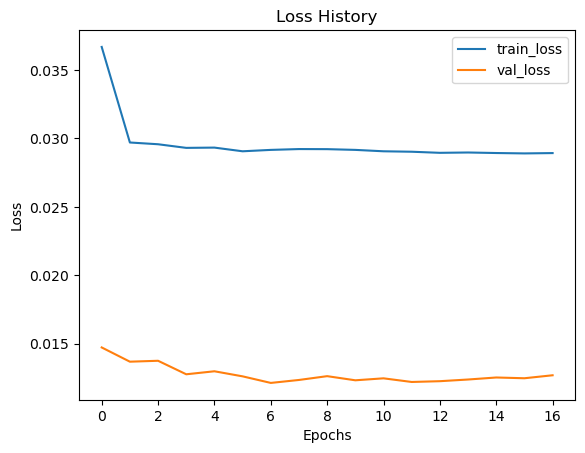

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

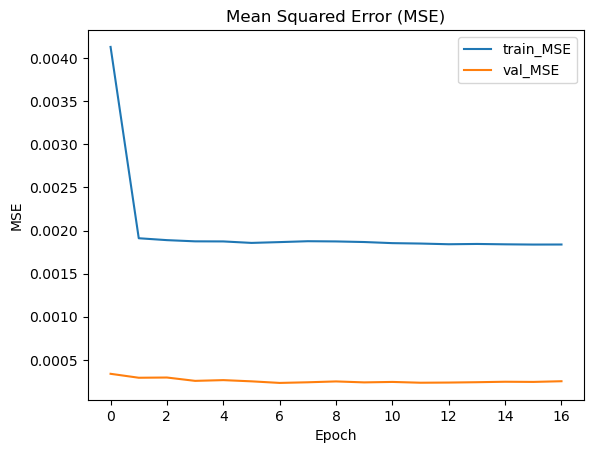

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

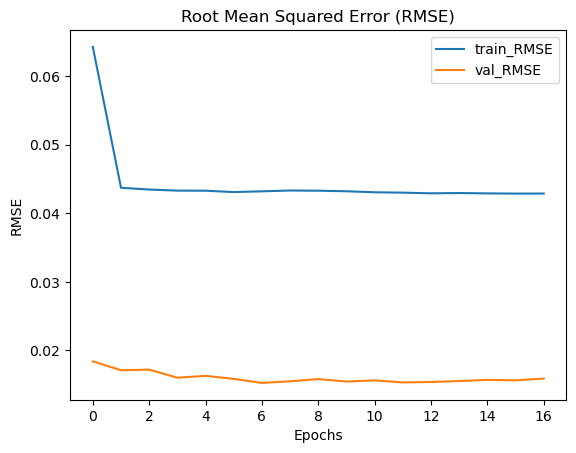

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

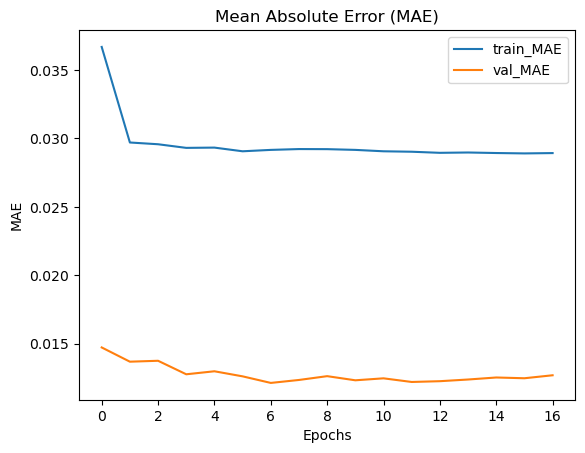

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

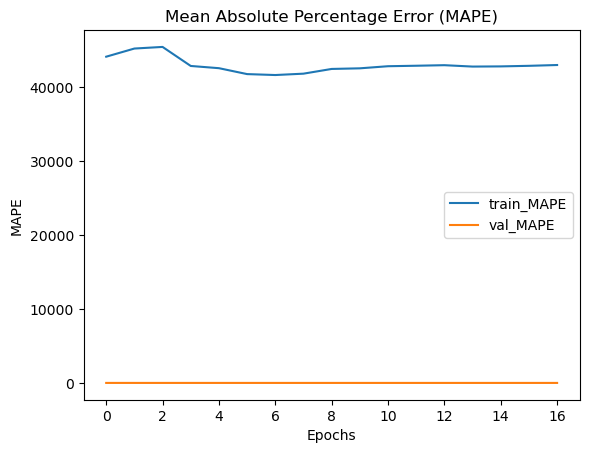

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:39:23.079643: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


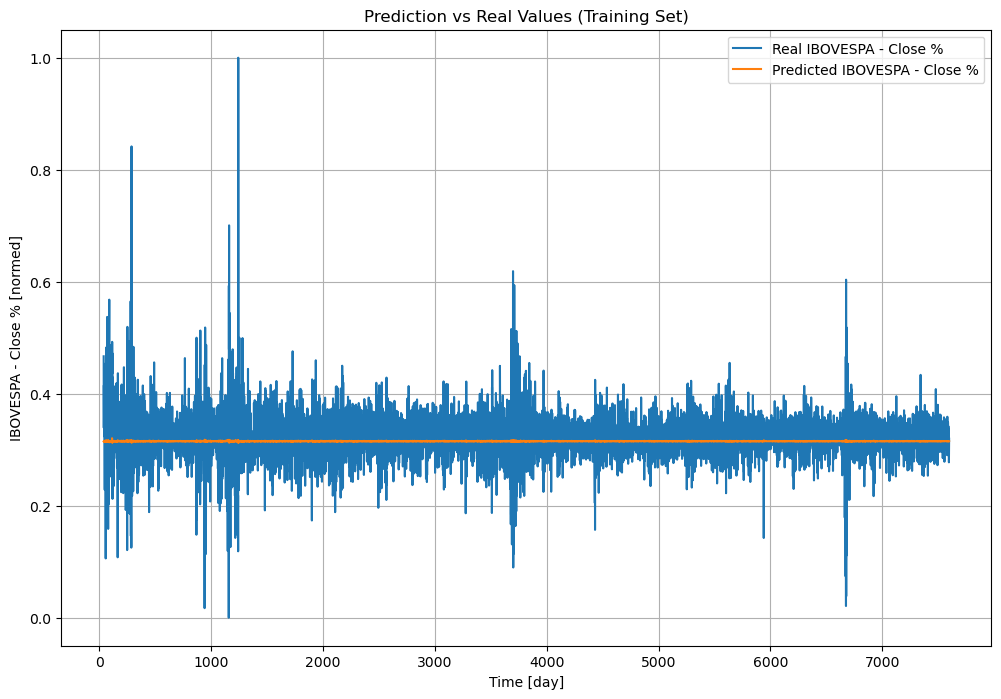

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


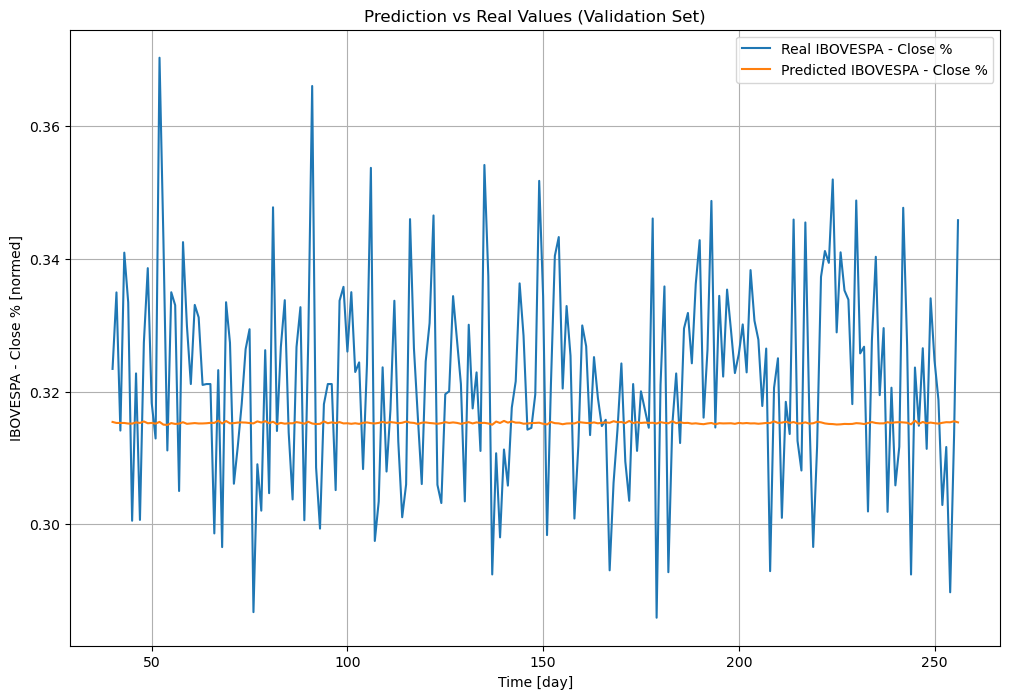

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


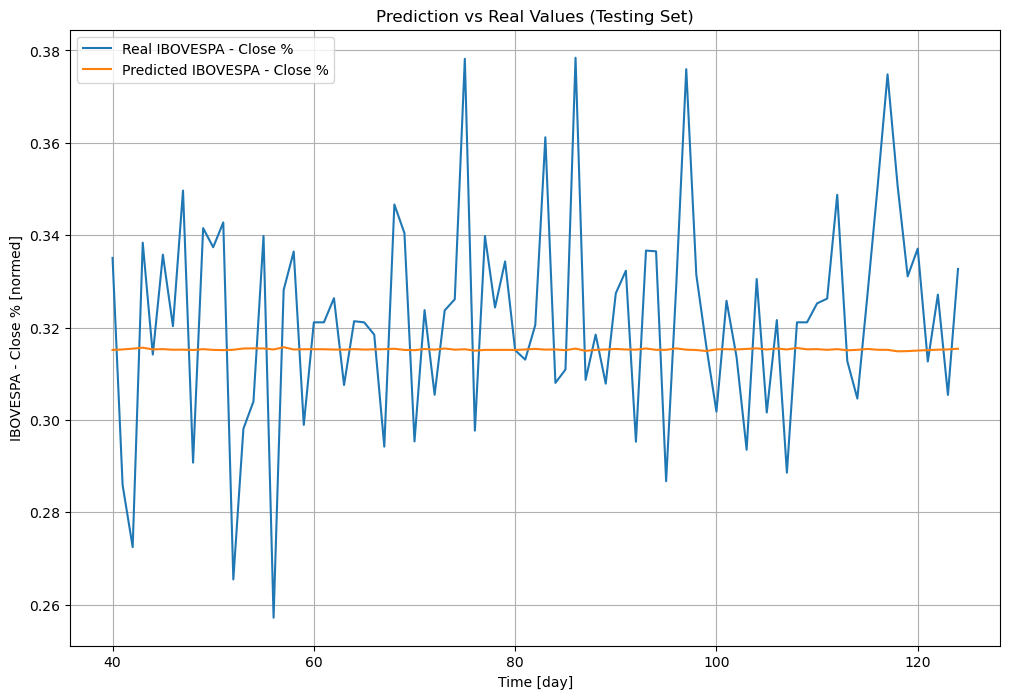

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

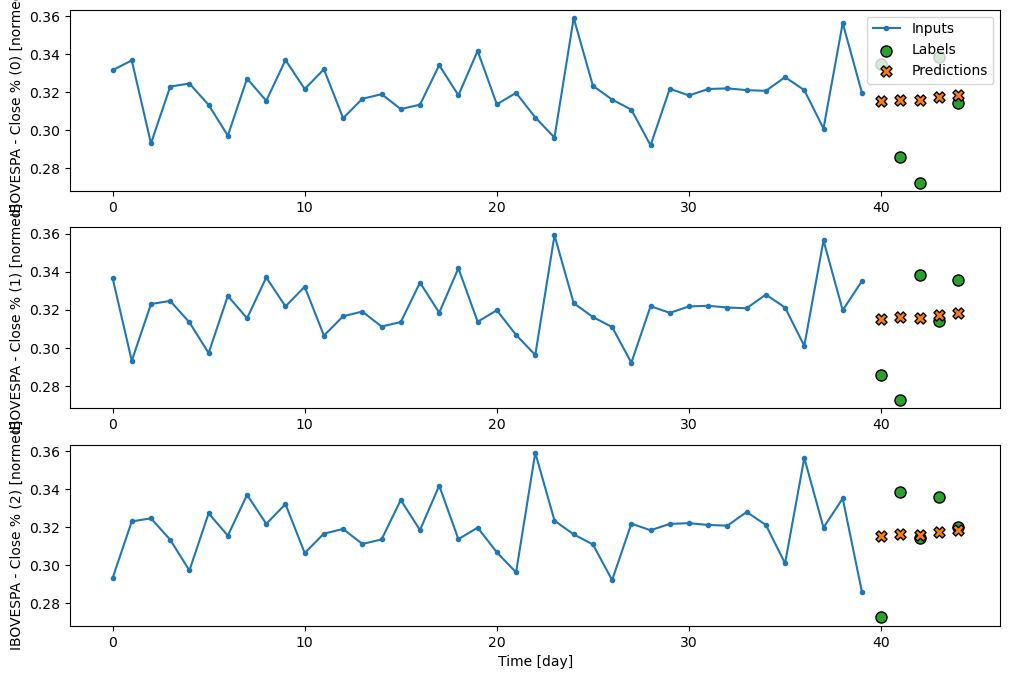

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:50s:291ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step


array([[[0.3151623 , 0.3151623 , 0.3151623 , ..., 0.3151623 ,
         0.3151623 , 0.3151623 ],
        [0.3158195 , 0.3158195 , 0.3158195 , ..., 0.3158195 ,
         0.3158195 , 0.3158195 ],
        [0.3157298 , 0.3157298 , 0.3157298 , ..., 0.3157298 ,
         0.3157298 , 0.3157298 ],
        [0.31731588, 0.31731588, 0.31731588, ..., 0.31731588,
         0.31731588, 0.31731588],
        [0.3183914 , 0.3183914 , 0.3183914 , ..., 0.3183914 ,
         0.31839144, 0.31839144]],

       [[0.3152665 , 0.3152665 , 0.3152665 , ..., 0.3152665 ,
         0.3152665 , 0.3152665 ],
        [0.31593278, 0.31593278, 0.31593278, ..., 0.31593278,
         0.31593278, 0.31593278],
        [0.31584254, 0.31584254, 0.31584254, ..., 0.31584254,
         0.31584254, 0.31584254],
        [0.31742486, 0.31742486, 0.31742486, ..., 0.31742486,
         0.31742486, 0.31742486],
        [0.31850204, 0.31850204, 0.31850204, ..., 0.31850204,
         0.31850207, 0.31850207]],

       [[0.315436  , 0.315436  , 0.3

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')